In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
import seaborn as sns

In [6]:
airQualityData = pd.read_csv('global_air_quality.csv')
airQualityData

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [9]:
airQualityData['PM25_Value'] = airQualityData['FactValueNumeric']
print(airQualityData[['FactValueNumeric', 'PM25_Value']])


      FactValueNumeric  PM25_Value
0                10.01       10.01
1                10.02       10.02
2                10.06       10.06
3                10.08       10.08
4                10.09       10.09
...                ...         ...
9445              9.92        9.92
9446              9.92        9.92
9447              9.94        9.94
9448              9.95        9.95
9449             92.79       92.79

[9450 rows x 2 columns]


In [13]:
average_pm25 = airQualityData.groupby('ParentLocation')['PM25_Value'].mean().reset_index()
average_pm25.rename(columns={'PM25_Value': 'Average_PM25'}, inplace=True)

airQualityData = airQualityData.merge(average_pm25, on='ParentLocation')
print(airQualityData[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']])

                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                                              Kenya   
9448                           United States of America   
9449                                        Afghanistan   

             ParentLocation  PM25_Value  Average_PM25  
0                    Africa       10.01     29.812282  
1                  Americas       10.02     14.645728  
2                    Europe       10.06     19.244727  
3                  Americas       10.08     14.645728  
4          

In [17]:
highest_pollution = average_pm25.loc[average_pm25['Average_PM25'].idxmax()]
print(highest_pollution['ParentLocation']) 
#it does suprise me that the Eastern Mediterranean has teh highest pollution because I'd expect it to be an area with a higher concentration of people and factories.

Eastern Mediterranean


In [21]:
airQualityData[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']].to_csv('processed_air_quality.csv', index=False)

In [25]:
planets = sns.load_dataset('planets')

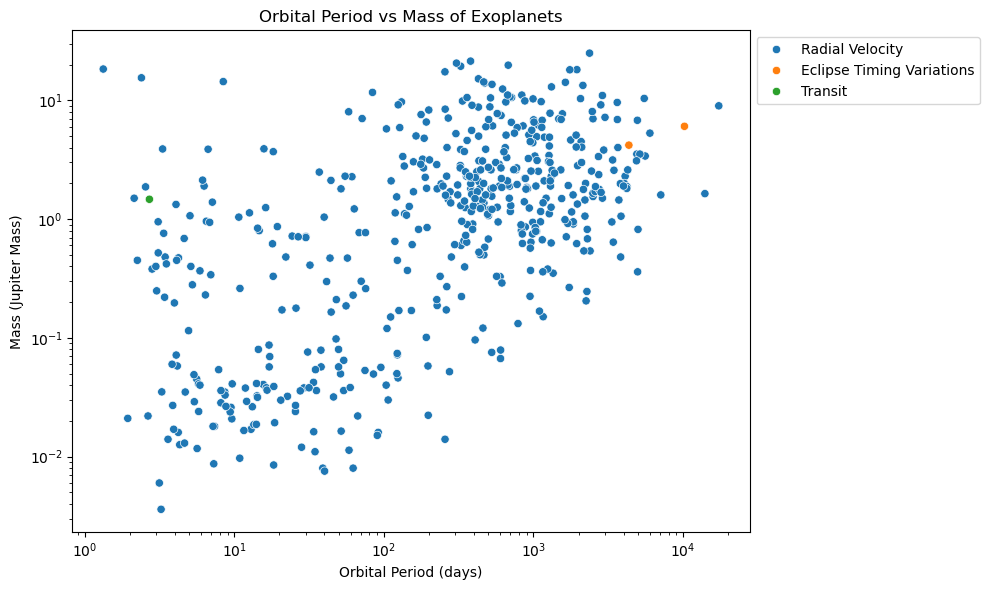

In [54]:
planets = planets.dropna(subset=['orbital_period', 'mass', 'method'])

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=planets, 
    x='orbital_period', 
    y='mass', 
    hue='method', 
    palette='tab10')
plt.xscale('log')
plt.yscale('log')
plt.title('Orbital Period vs Mass of Exoplanets')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (Jupiter Mass)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
discovery_counts = planets.groupby(['year', 'method']).size().reset_index(name='count')


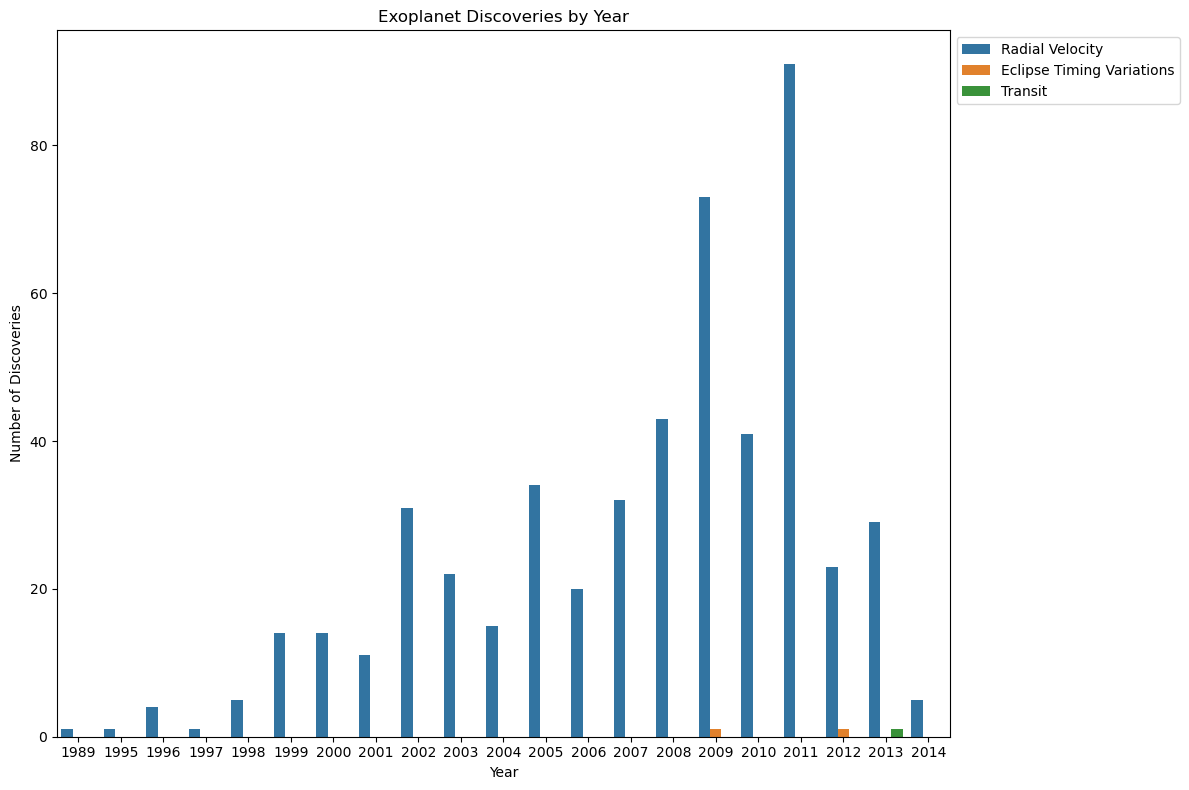

In [52]:
plt.figure(figsize=(12, 8))
bar_chart = sns.barplot(
    data=discovery_counts,
    x='year',
    y='count',
    hue='method',
    palette='tab10')
plt.title('Exoplanet Discoveries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()